In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.animation import FuncAnimation as FA

plt.rc("font", family="serif", size=16)
plt.rc("mathtext", fontset="cm")
plt.rc("lines", lw=2)

/home/mjohnsrud/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


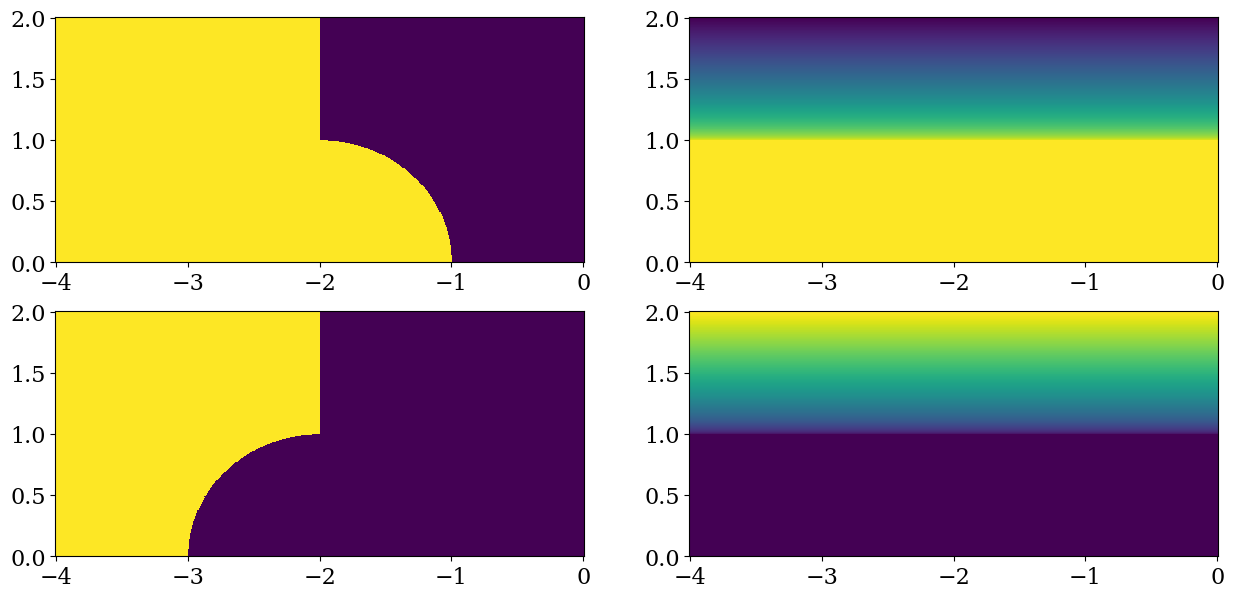

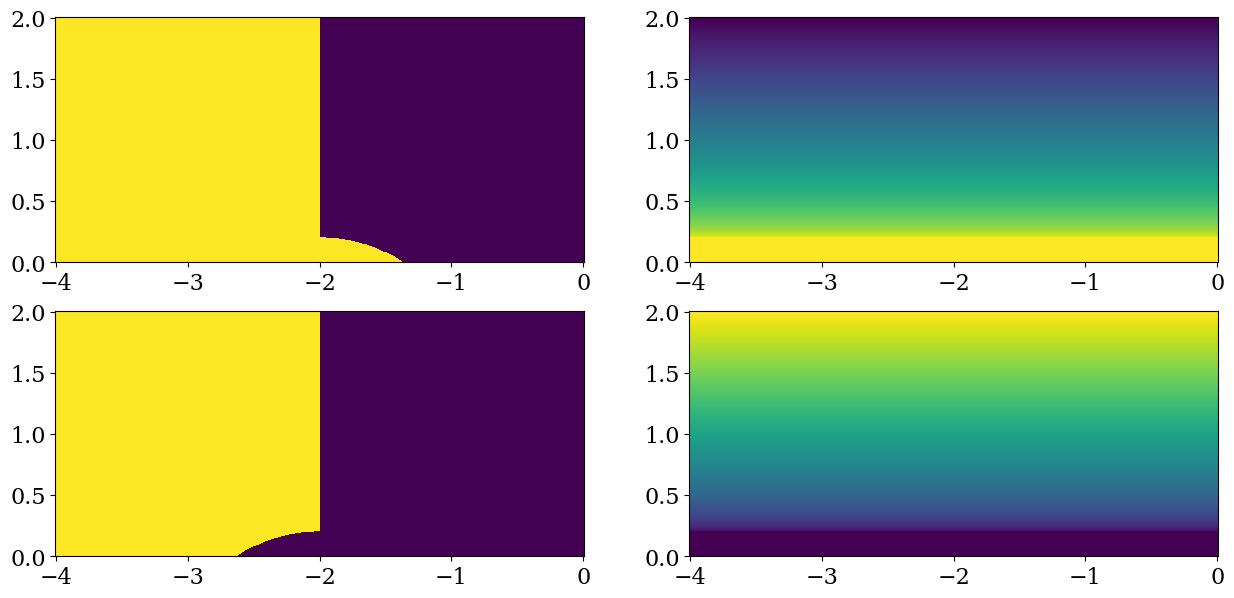

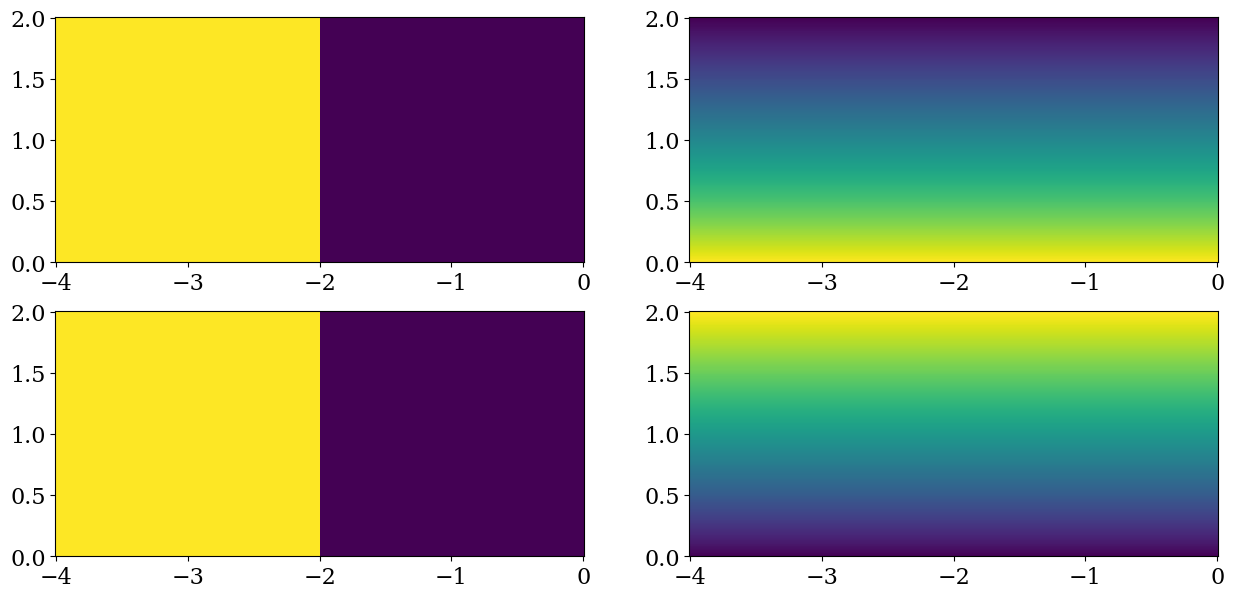

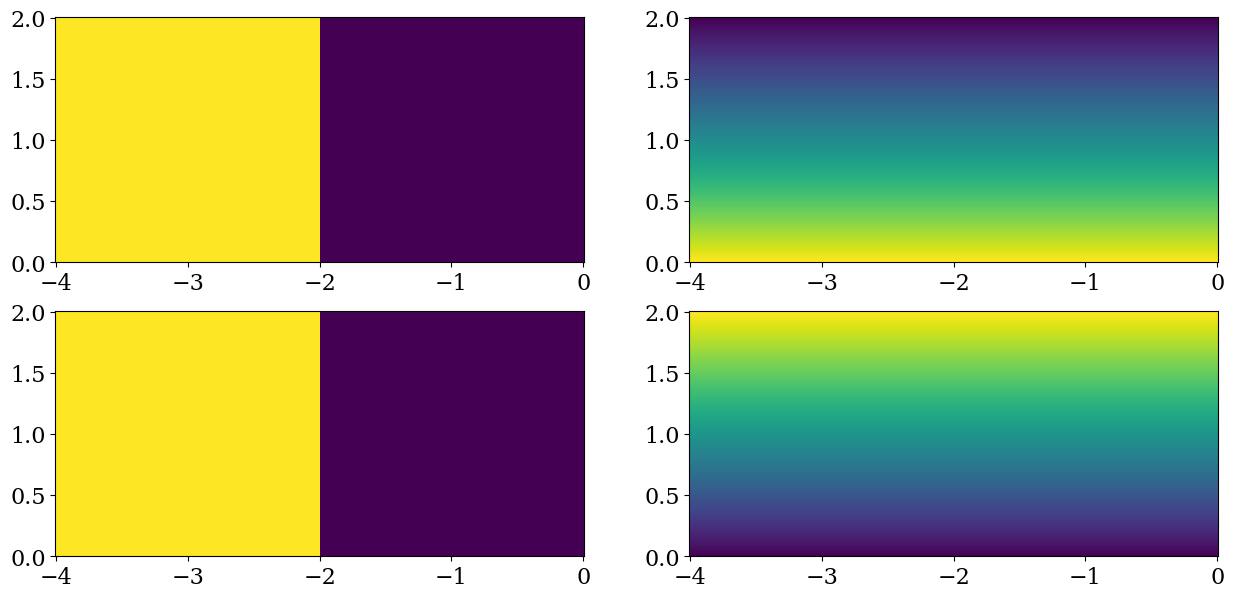

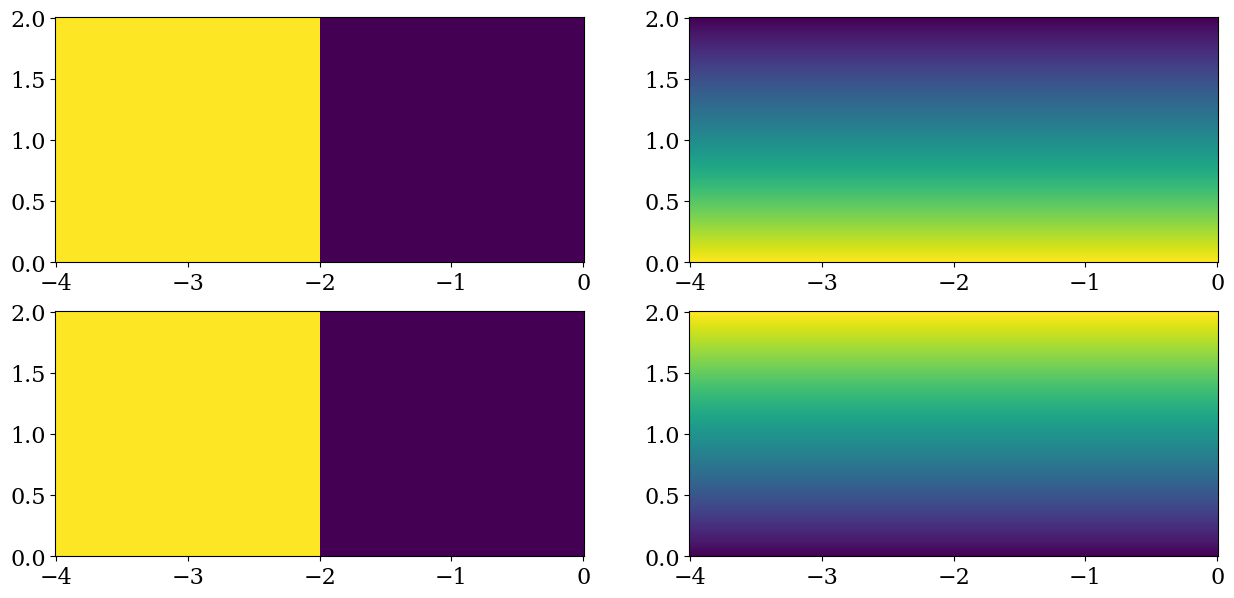

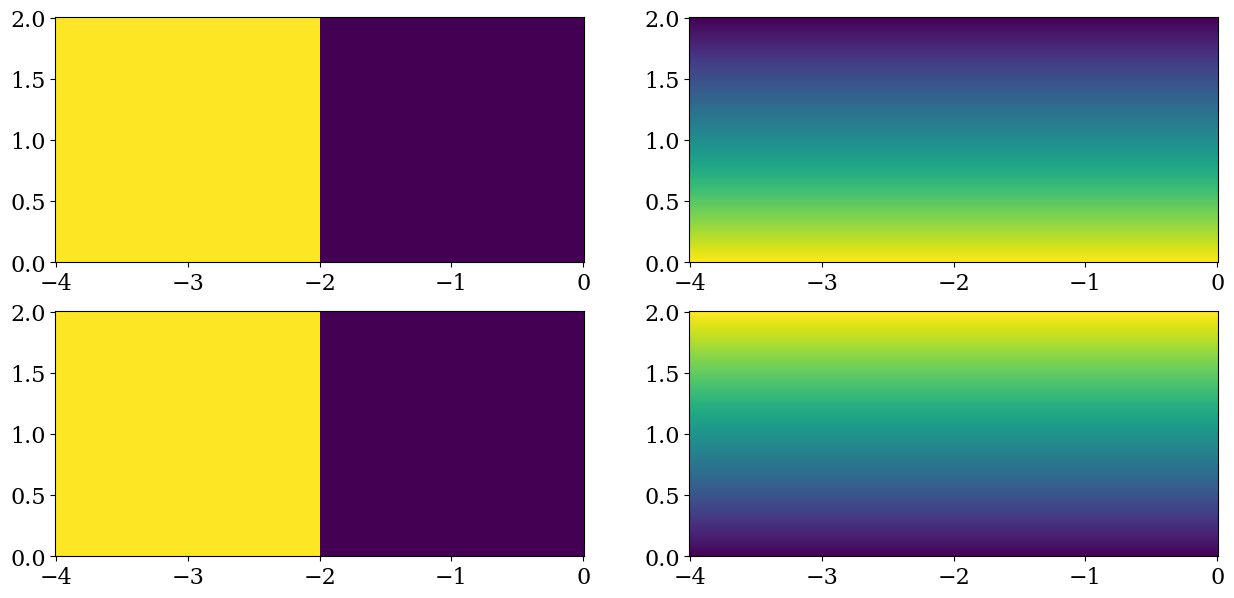

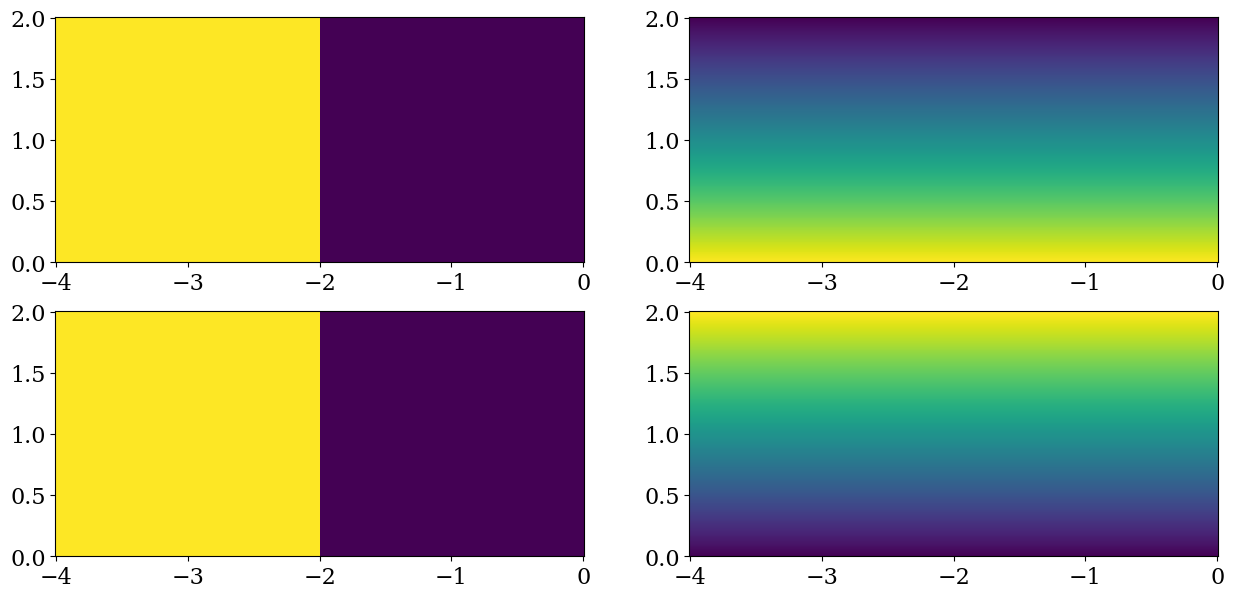

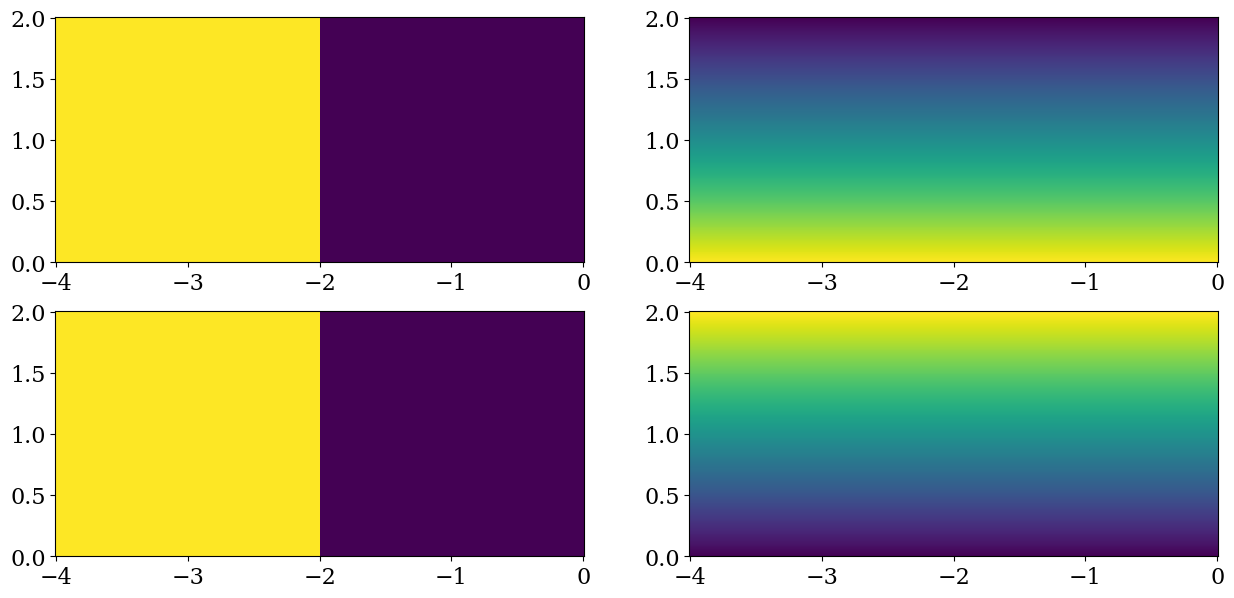

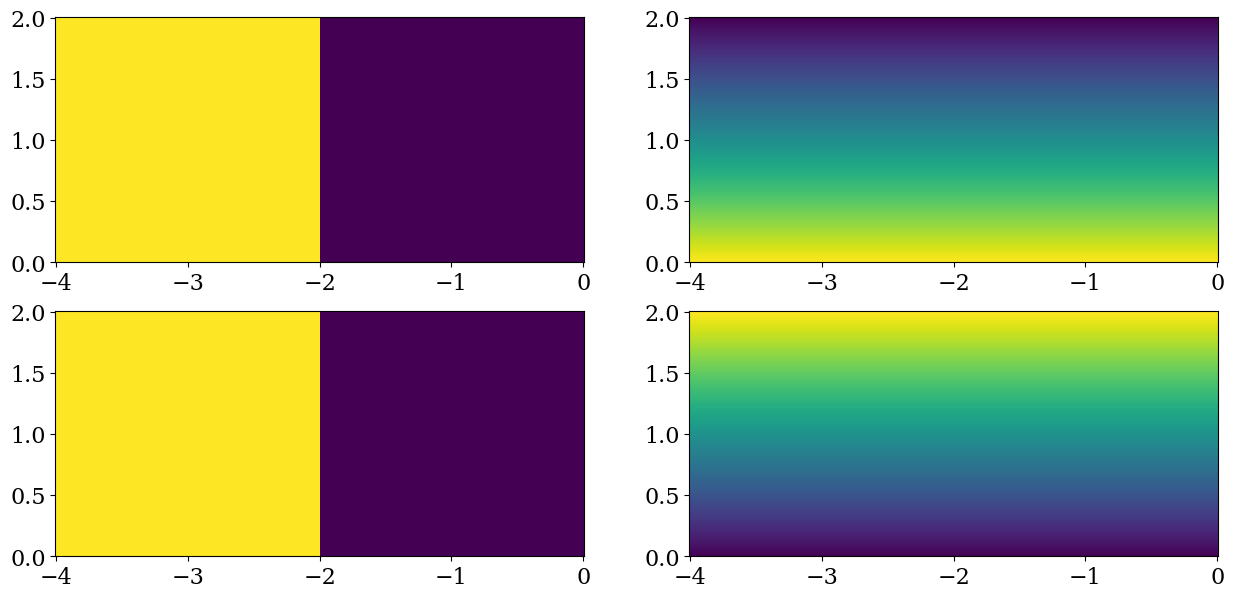

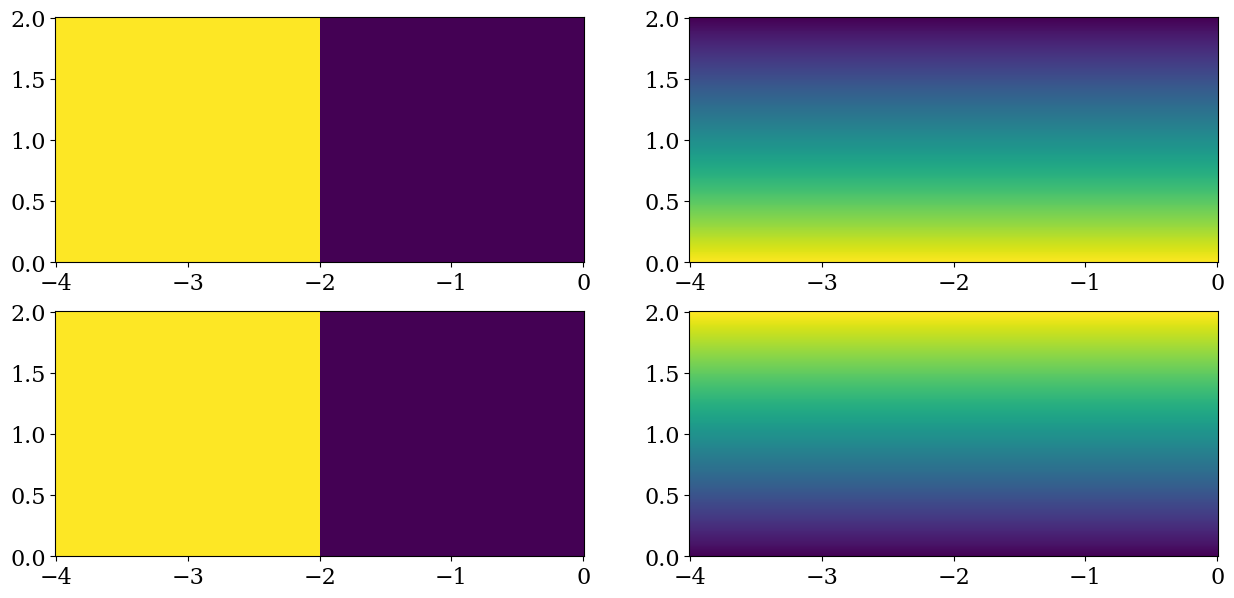

In [2]:
lm = lambda A, B, y : A + 2 - np.sqrt(1 - (B + y) * (B + 3*y) + 0j)
lp = lambda A, B, y : A + 2 + np.sqrt(1 - (B + y) * (B + 3*y) + 0j)
yList = np.linspace(0, 4, 10)

A = np.linspace(0, -4, 500)
B = np.linspace(0, 2, 500)

A, B = np.meshgrid(A, B)

for y in yList:
    fig, ax = plt.subplots(2,2, figsize=(15, 7))
    for i, l in enumerate([lm, lp]):
        Z = l(A, B, y)
        ax[i, 0].pcolor(A, B, Z.real<0)
        ax[i, 1].pcolor(A, B, Z.imag)

    plt.show()


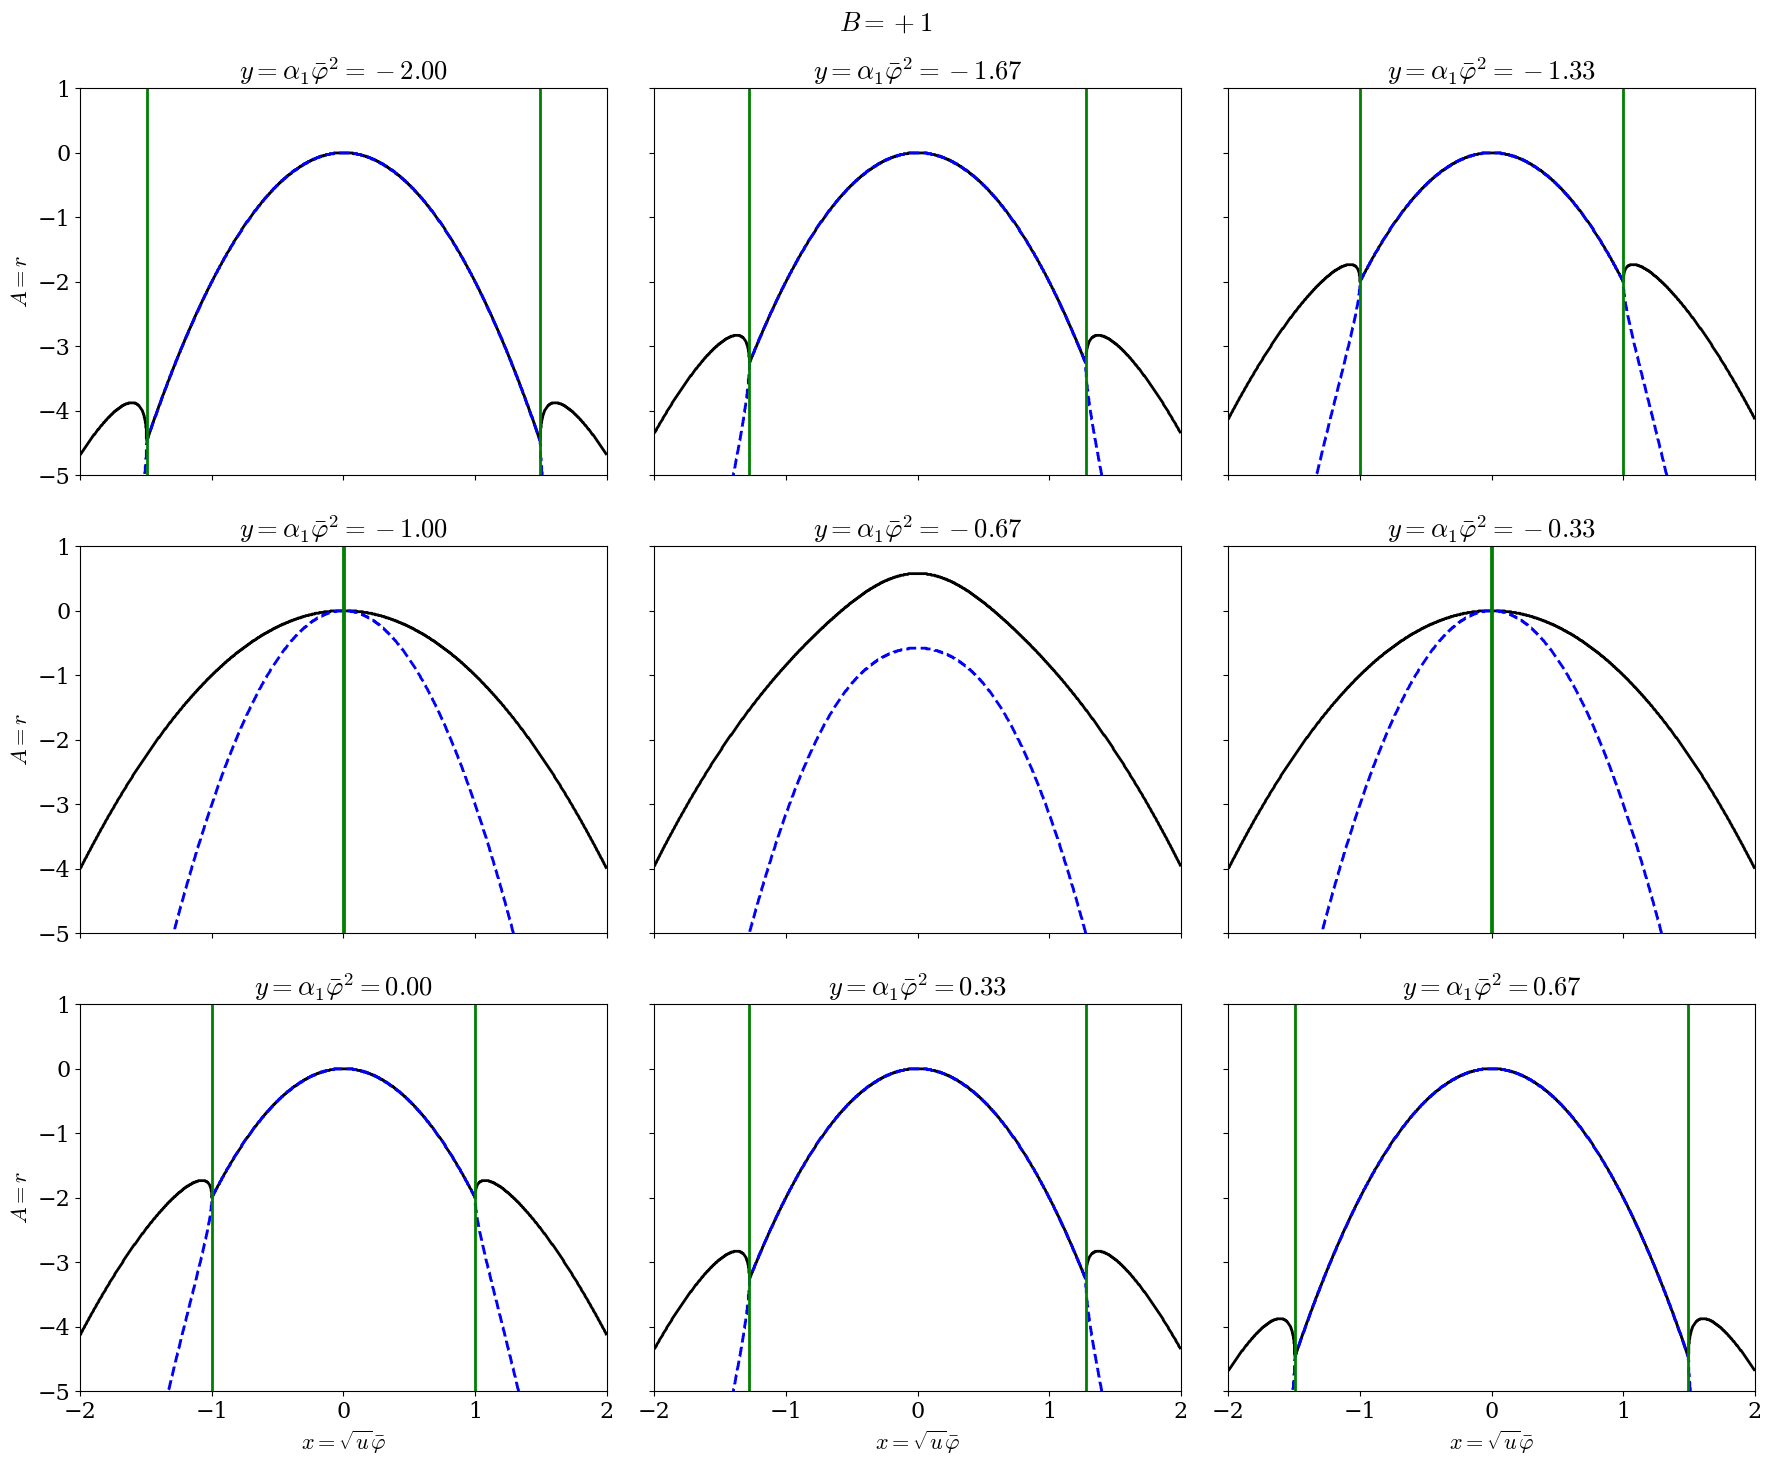

In [4]:
lm = lambda A, x, y : A + 2*x**2 - np.sqrt(x**4 - (1 + y) * (1 + 3*y) + 0j)
lp = lambda A, x, y : A + 2*x**2 + np.sqrt(x**4 - (1 + y) * (1 + 3*y) + 0j)

n = 3
eps = 1e-9
yList = np.linspace(-2 - eps, 2/3 + eps, n**2)

A = np.linspace(1, -5, 500)
x = np.linspace(-2, 2, 1000)

A, x = np.meshgrid(A, x)
c = ['k', 'b']
ls = ['-', '--']

fig, ax = plt.subplots(n, n, figsize=(18, 15), sharex=True, sharey=True)
for k, y in enumerate(yList):
    ind = (k//n, k%n)
    
    for i, l in enumerate([lm, lp]):
        Z = l(A, x, y)
        ax[ind].contour(x, A, Z.real<0, colors=c[i], linestyles=ls[i])
    
    ax[ind].contour(x, A, Z.imag != 0, colors='green')
    ax[ind].set_title('$y = \\alpha_1\\bar\\varphi^2'+ "={y:.2f}$".format(y=y))
    
    if ind[0]==2:
        ax[ind].set_xlabel("$x = \\sqrt{ u } \\bar\\varphi$")
    if ind[1]==0:
        ax[ind].set_ylabel("$A = r$")

fig.suptitle("$B=+1$")
plt.tight_layout()
fig.savefig("phase.pdf")
plt.show()

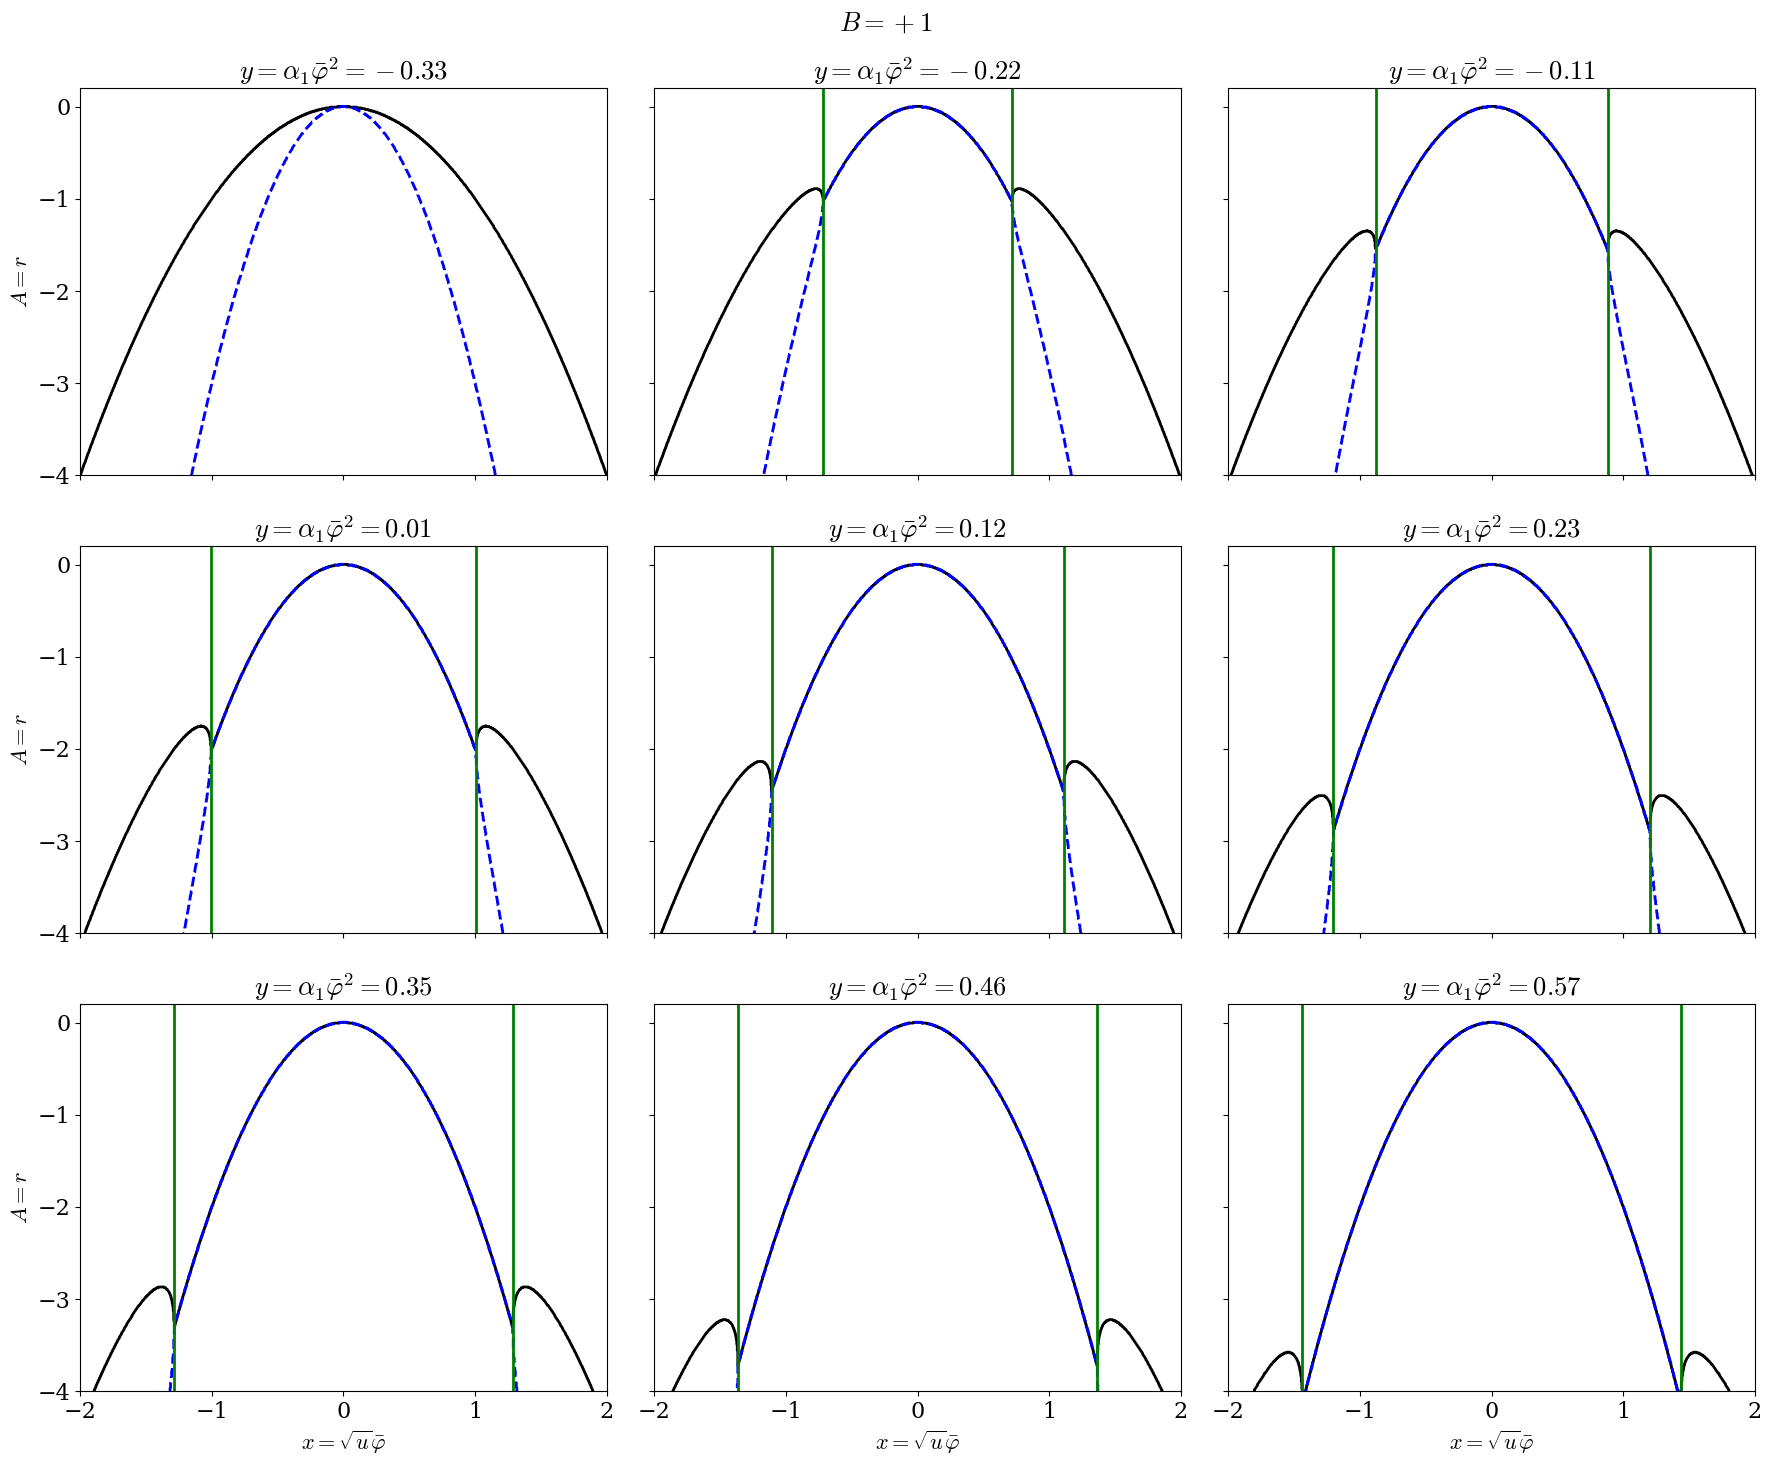

In [ ]:
lm = lambda A, x, y : A + 2*x**2 - np.sqrt(x**4 - (1 + y) * (1 + 3*y) + 0j)
lp = lambda A, x, y : A + 2*x**2 + np.sqrt(x**4 - (1 + y) * (1 + 3*y) + 0j)

n = 3
d = .57143
# d = 
yList = np.linspace(-1/3, d, n**2)

A = np.linspace(.2, -4, 500)
x = np.linspace(-2, 2, 1000)

A, x = np.meshgrid(A, x)
c = ['k', 'b']
ls = ['-', '--']

fig, ax = plt.subplots(n, n, figsize=(18, 15), sharex=True, sharey=True)
for k, y in enumerate(yList):
    ind = (k//n, k%n)
    
    for i, l in enumerate([lm, lp]):
        Z = l(A, x, y)
        ax[ind].contour(x, A, Z.real<0, colors=c[i], linestyles=ls[i])
    
    ax[ind].contour(x, A, Z.imag != 0, colors='green')
    ax[ind].set_title('$y = \\alpha_1\\bar\\varphi^2'+ "={y:.2f}$".format(y=y))
    if ind[0]==2:
        ax[ind].set_xlabel("$x = \\sqrt{ u } \\bar\\varphi$")
    if ind[1]==0:
        ax[ind].set_ylabel("$A = r$")

fig.suptitle("$B=+1$")
plt.tight_layout()
plt.show()